In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv

In [28]:
# Initial state (position, velocity)
x0 = np.array([[0, 5]]).T

# Covariance of measurement
P = np.array([[0.01, 0], [0, 1]])

# Noise in prediction / process model
Q = np.array([[0.1, 0], [0, 0.1]])

# Noise in measurement model
R = np.array([0.05])

# Timestep
dt = 0.5

# Fixed input (acceleration)
u = np.array([-2]).reshape(1, 1)

# True output after one timestep
y = np.array([2.2]).reshape(1, 1)

# Process model
F = np.array([[1, dt], [0, 1]])
G = np.array([[0, dt]]).T
H = np.array([1, 0]).reshape(1, 2)

In [29]:
def Predict(F, G, x, u, P, Q):
    x = F @ x + G @ u
    P = F @ P @ F.T + Q
    return x, P

def Update(P, H, R, x, y):
    K = P @ H.T / (H @ P @ H.T + R)
    x = x + K @ (y - H @ x)
    P = (np.identity(K.shape[0]) - K @ H) @ P
    return x, P

x:  [[2.5]
 [4. ]] 
P: [[0.36 0.5 ]
 [0.5  1.1 ]]
x:  [[2.24]
 [3.63]] 
P: [[0.04 0.06]
 [0.06 0.49]]


Text(0, 0.5, 'Velocity (m/s)')

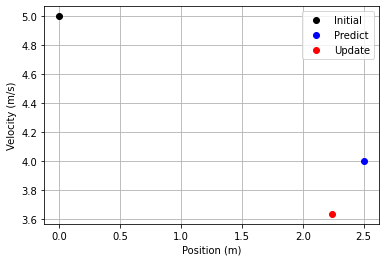

In [30]:
plt.plot(x0[0], x0[1], 'ko', label='Initial')

# Predict - Process model
x, P = Predict(F, G, x0, u, P, Q)
print('x: ', np.round(x,2), '\nP:', np.round(P,2))
plt.plot(x[0], x[1], 'bo', label='Predict')

# Update - Measurement model
x, P = Update(P, H, R, x, y)
print('x: ', np.round(x,2), '\nP:', np.round(P,2))
plt.plot(x[0], x[1], 'ro', label='Update')

plt.grid()
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')